In [ ]:
pip install lime

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
import pandas as pd
from google.colab import drive
import numpy as np
import lime.lime_tabular
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NFRF ML/RF_Data1.csv')
df

,GNCN,HIBP,HICOLV,STRVEN,PPHYG,PECON,OVCRW,IVNDRUS,TRVENRG,SKPUPR,...,LWFLIN,EXPMQBT,SMSCHNSM,UNCHRIL,EXPIDARPOL,ALG,MAL,ENFVR,UTI,RTI
0,1,1,4,1,1,1,1,1,1,3,...,2,2,1,1,1,2,1,0,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,3,1,1,1,2,0,1,1,1
2,1,3,1,1,3,4,1,2,1,1,...,1,2,1,1,1,1,1,0,1,1
3,1,1,1,1,2,2,2,4,2,4,...,1,2,3,1,1,1,0,0,1,1
4,1,2,1,2,3,3,2,1,3,2,...,3,3,1,2,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1947,1,1,1,1,1,1,1,1,1,1,...,1,3,1,1,1,1,1,0,0,0
1948,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,0,0,0
1949,1,1,1,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,0,1,1


In [ ]:
#Using DataFrame.drop() method.
df2=df.drop(df.columns[0], axis=1)
df2

,HIBP,HICOLV,STRVEN,PPHYG,PECON,OVCRW,IVNDRUS,TRVENRG,SKPUPR,DRCOIFPS,LWFLIN,EXPMQBT,SMSCHNSM,UNCHRIL,EXPIDARPOL,ALG,MAL,ENFVR,UTI,RTI
0,1,4,1,1,1,1,1,1,3,1,2,2,1,1,1,2,1,0,1,1
1,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2,0,1,1,1
2,3,1,1,3,4,1,2,1,1,1,1,2,1,1,1,1,1,0,1,1
3,1,1,1,2,2,2,4,2,4,4,1,2,3,1,1,1,0,0,1,1
4,2,1,2,3,3,2,1,3,2,3,3,3,1,2,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1946,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0
1947,1,1,1,1,1,1,1,1,1,1,1,3,1,1,1,1,1,0,0,0
1948,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,0,0,0
1949,1,1,1,1,1,1,1,1,1,3,2,1,1,1,1,1,1,0,1,1


In [ ]:
X = df2.iloc[:, :16].values
X

array([[1, 4, 1, ..., 1, 1, 2],
       [1, 1, 1, ..., 1, 1, 2],
       [3, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
Y = df2.iloc[:, 16:].values
Y

array([[1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 0, 1, 1],
       ...,
       [1, 0, 0, 0],
       [1, 0, 1, 1],
       [1, 0, 0, 0]])

In [ ]:
# Function to evaluate classifiers
def evaluate(y_true, y_pred):
    print("Performance Evaluation:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    auc_score = roc_auc_score(y_true, y_pred, average='macro')
    print("AUC-ROC:", auc_score)
    #print("LogLoss",log_loss)
    #print(confusion_matrix(y_true, y_pred))

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Define classifiers
xgb = XGBClassifier()

In [ ]:
# Create multi-output classifiers
multi_xgb = MultiOutputClassifier(xgb)

In [ ]:
# Define parameter grids for grid search
param_grid_xgb = {'estimator__n_estimators': [100, 200, 300], 'estimator__max_depth': [3, 5, 7]}

In [ ]:
# Perform grid search for each classifier
xgb_grid = GridSearchCV(multi_xgb, param_grid_xgb, cv=3, scoring='accuracy')

In [ ]:
# Fit the classifiers to the baseline dataset
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=MultiOutputClassifier(estimator=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=None,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     gamma=None,
                                                                     grow_policy=None,
                                                                     importance_type=None,
                                                                     interaction_cons...
                                                                     max_cat_threshold=None,
                                                                     max_cat_to_onehot=None,
                                                                     max_delta_step=None,
                                                                     max_depth=None,
                                                                     max_leaves=None,
                                                                     min_child_weight=None,
                                                                     missing=nan,
                                                                     monotone_constraints=None,
                                                                     multi_strategy=None,
                                                                     n_estimators=None,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None,
                                                                     random_state=None, ...)),
             param_grid={'estimator__max_depth': [3, 5, 7],
                         'estimator__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# Make predictions on the baseline dataset
xgb_pred = xgb_grid.best_estimator_.predict(X_test)

In [ ]:
print("\nExtreme Gradient Boosting:")
evaluate(y_test, xgb_pred)


Extreme Gradient Boosting:
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       282
           1       0.64      0.34      0.44       103
           2       0.64      0.26      0.37       106
           3       0.67      0.32      0.43        88

   micro avg       0.81      0.56      0.66       579
   macro avg       0.71      0.44      0.53       579
weighted avg       0.77      0.56      0.63       579
 samples avg       0.63      0.53      0.55       579

Accuracy: 0.4219948849104859
AUC-ROC: 0.6662934837145299


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/lime/lime_tabular.py:372: UserWarning: 
                    Prediction probabilties do not sum to 1, and
                    thus does not constitute a probability space.
                    Check that you classifier outputs probabilities
                    (Not log probabilities, or actual class predictions).
                    
  warnings.warn("""
<ipython-input-53-5c3ccbd72e36>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


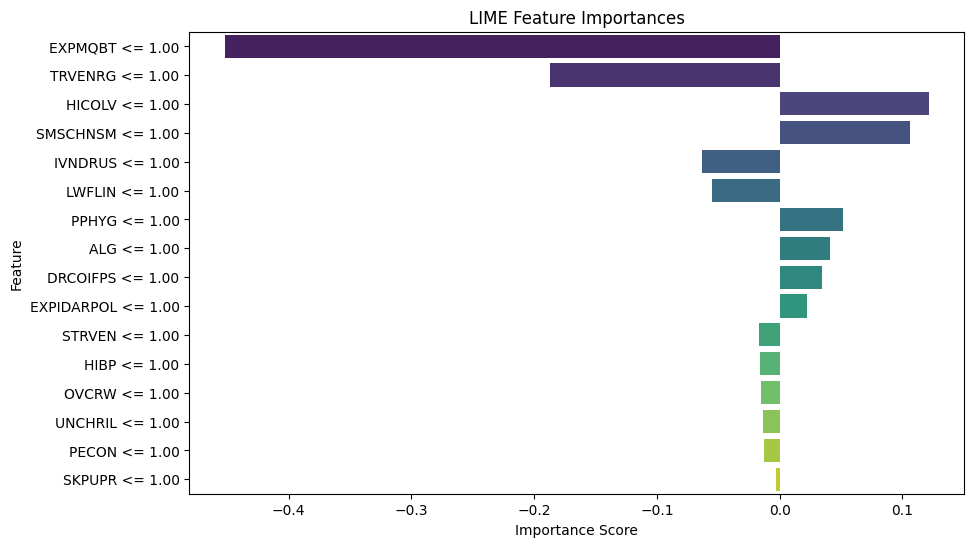

In [ ]:
# LIME explanation plot
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=df2.columns[:32],
    class_names=['MAL', 'ENFVR','UTI', 'RTI'],
    discretize_continuous=True
)

i = np.random.randint(0, X_test.shape[0])

# Create a wrapper function for predict_proba to handle multi-output
def predict_proba_wrapper(x):
    predictions = xgb_grid.best_estimator_.predict_proba(x)
    # predictions is a list of arrays, so we need to combine them into a single 2D array
    return np.column_stack(predictions)

exp = explainer.explain_instance(X_test[i], predict_proba_wrapper, num_features=32)

# Extract feature importances for the selected instance
importance_df = pd.DataFrame(exp.as_list(), columns=['Feature', 'Importance'])

# Plot LIME explanation
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('LIME Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()